Tugas Group Project 1
=====================
## Anggota Kelompok
1. Muhammad Faqih (5026211001)
2. I Gusti Agung Jaya Hiswara (5026211122)
3. Muhammad Afaf (5026221157)
4. Candline Audrina Firsta (502622159)

## Deskripsi Tugas 1: Eksplorasi dan Prapemrosesan Data Kriminal Los Angeles
Tugas 1 ini bertujuan untuk melakukan eksplorasi dan prapemrosesan dataset kejahatan di Los Angeles dari tahun 2020 hingga sekarang. Proyek ini berfokus pada analisis data untuk mengidentifikasi pola-pola kriminal dan mempersiapkan dataset yang bersih dan siap untuk model prediksi. Data yang diolah mencakup atribut seperti jenis kejahatan (Crm Cd atau Crm Cd Desc) yang akan digunakan sebagai label kelas, waktu, lokasi, dan data korban.

## Tahapan & Langkah-langkah
1. Eksplorasi Data
Pada bagian ini, kita akan melakukan langkah-langkah berikut:
Memuat dataset dan menampilkan beberapa baris pertama.
Memeriksa kolom dan tipe data untuk memahami struktur data.
Menganalisis distribusi kelas target (Crm Cd atau Crm Cd Desc).
Memeriksa missing values dan menentukan kolom yang memerlukan perhatian khusus.
Melakukan analisis statistik deskriptif untuk fitur numerik.
Menyediakan visualisasi awal seperti histogram dan bar plot untuk memahami pola-pola utama dalam data.

2. Pembersihan Data
Bagian ini akan mencakup:
Penanganan missing values dengan berbagai strategi seperti penghapusan atau pengisian nilai.
Mengidentifikasi dan menghapus data yang tidak relevan.
Menghapus data duplikat.
Mengatasi outlier dalam fitur numerik seperti usia korban atau waktu kejahatan.

3. Transformasi Data
Pada tahap ini, kita akan melakukan:
Konversi waktu dan tanggal ke dalam format yang dapat dianalisis, serta mengekstrak fitur baru seperti hari, bulan, dan jam kejadian.
One-hot encoding untuk variabel kategorikal.
Normalisasi atau standarisasi untuk kolom numerik.
Feature engineering dengan membuat fitur baru berdasarkan waktu atau lokasi, seperti biner siang/malam.

4. Visualisasi dan Analisis Awal
Visualisasi lebih dalam akan dilakukan, termasuk:
Distribusi kejahatan berdasarkan waktu, untuk melihat tren temporal.
Pemetaan kejahatan berdasarkan lokasi, jika data lokasi tersedia, menggunakan heatmap atau scatter plot.
Membuat matriks korelasi untuk memahami hubungan antar fitur.

5. Evaluasi dan Kesimpulan
Akhir dari notebook ini akan menyiapkan:
Simpulan dari eksplorasi data, dengan penjelasan fitur-fitur yang paling relevan untuk prediksi.
Menyediakan dataset akhir yang bersih dan siap untuk pemodelan.
Menyimpan dataset hasil prapemrosesan dalam format CSV.

## Output yang Diharapkan

Dokumentasi Jupyter Notebook dari seluruh proses eksplorasi dan pembersihan data.
Visualisasi yang memberikan wawasan mendalam terhadap pola-pola dalam data kejahatan.
Dataset bersih yang siap digunakan untuk pemodelan prediksi jenis kejahatan.

## Install & Import Library


In [413]:
#Install Library
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install sklearn

#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


## SOAL 1: Eksplorasi Data Analisis (EDA)

### TASK: 
1. Memuat dataset dan menampilkan beberapa baris pertama.
2. Memeriksa kolom dan tipe data untuk memahami struktur data.
3. Menganalisis distribusi kelas target (Crm Cd atau Crm Cd Desc).
4. Memeriksa missing values dan menentukan kolom yang memerlukan perhatian khusus.
5. Melakukan analisis statistik deskriptif untuk fitur numerik.
6. Menyediakan visualisasi awal seperti histogram dan bar plot untuk memahami pola-pola utama dalam data.

In [414]:
## Memuat Dataset dan Menampilkan beberapa baris pertama

# Memuat dataset
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [415]:
# Memeriksa kolom dan tipe data untuk memahami struktur data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978628 entries, 0 to 978627
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           978628 non-null  int64  
 1   Date Rptd       978628 non-null  object 
 2   DATE OCC        978628 non-null  object 
 3   TIME OCC        978628 non-null  int64  
 4   AREA            978628 non-null  int64  
 5   AREA NAME       978628 non-null  object 
 6   Rpt Dist No     978628 non-null  int64  
 7   Part 1-2        978628 non-null  int64  
 8   Crm Cd          978628 non-null  int64  
 9   Crm Cd Desc     978628 non-null  object 
 10  Mocodes         834648 non-null  object 
 11  Vict Age        978628 non-null  int64  
 12  Vict Sex        841430 non-null  object 
 13  Vict Descent    841419 non-null  object 
 14  Premis Cd       978613 non-null  float64
 15  Premis Desc     978043 non-null  object 
 16  Weapon Used Cd  325959 non-null  float64
 17  Weapon Des

In [416]:
# Cek Tipe Data numerical dan categorical
numerical = df.select_dtypes(include=[np.number]).columns
print('Numerical Columns: ', numerical)
print('Total Numerical Columns: ', len(numerical))


Numerical Columns:  Index(['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd',
       'Vict Age', 'Premis Cd', 'Weapon Used Cd', 'Crm Cd 1', 'Crm Cd 2',
       'Crm Cd 3', 'Crm Cd 4', 'LAT', 'LON'],
      dtype='object')
Total Numerical Columns:  15


In [417]:
# Kategorikal Columns
categorical = df.select_dtypes(include=[object]).columns
print('Categorical Columns: ', categorical)
print('Total Categorical Columns: ', len(categorical))

Categorical Columns:  Index(['Date Rptd', 'DATE OCC', 'AREA NAME', 'Crm Cd Desc', 'Mocodes',
       'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status',
       'Status Desc', 'LOCATION', 'Cross Street'],
      dtype='object')
Total Categorical Columns:  13


In [418]:
# Cek Missing Value
missing = df.isnull().sum()
print('Missing Value: ', missing)

Missing Value:  DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           143980
Vict Age               0
Vict Sex          137198
Vict Descent      137209
Premis Cd             15
Premis Desc          585
Weapon Used Cd    652669
Weapon Desc       652669
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          909812
Crm Cd 3          976319
Crm Cd 4          978564
LOCATION               0
Cross Street      827201
LAT                    0
LON                    0
dtype: int64


In [419]:
# Analisis Statistik Deskriptif
desc = df.describe()
print('Descriptive Statistics: ', desc)


Descriptive Statistics:                DR_NO       TIME OCC           AREA    Rpt Dist No  \
count  9.786280e+05  978628.000000  978628.000000  978628.000000   
mean   2.196564e+08    1338.802627      10.702561    1116.686084   
std    1.290395e+07     651.622947       6.107280     610.836054   
min    8.170000e+02       1.000000       1.000000     101.000000   
25%    2.106073e+08     900.000000       5.000000     589.000000   
50%    2.208116e+08    1420.000000      11.000000    1141.000000   
75%    2.309110e+08    1900.000000      16.000000    1617.000000   
max    2.499253e+08    2359.000000      21.000000    2199.000000   

            Part 1-2         Crm Cd       Vict Age      Premis Cd  \
count  978628.000000  978628.000000  978628.000000  978613.000000   
mean        1.404785     500.810635      29.122904     306.181502   
std         0.490851     206.309796      21.961531     218.908131   
min         1.000000     110.000000      -4.000000     101.000000   
25%         1.000

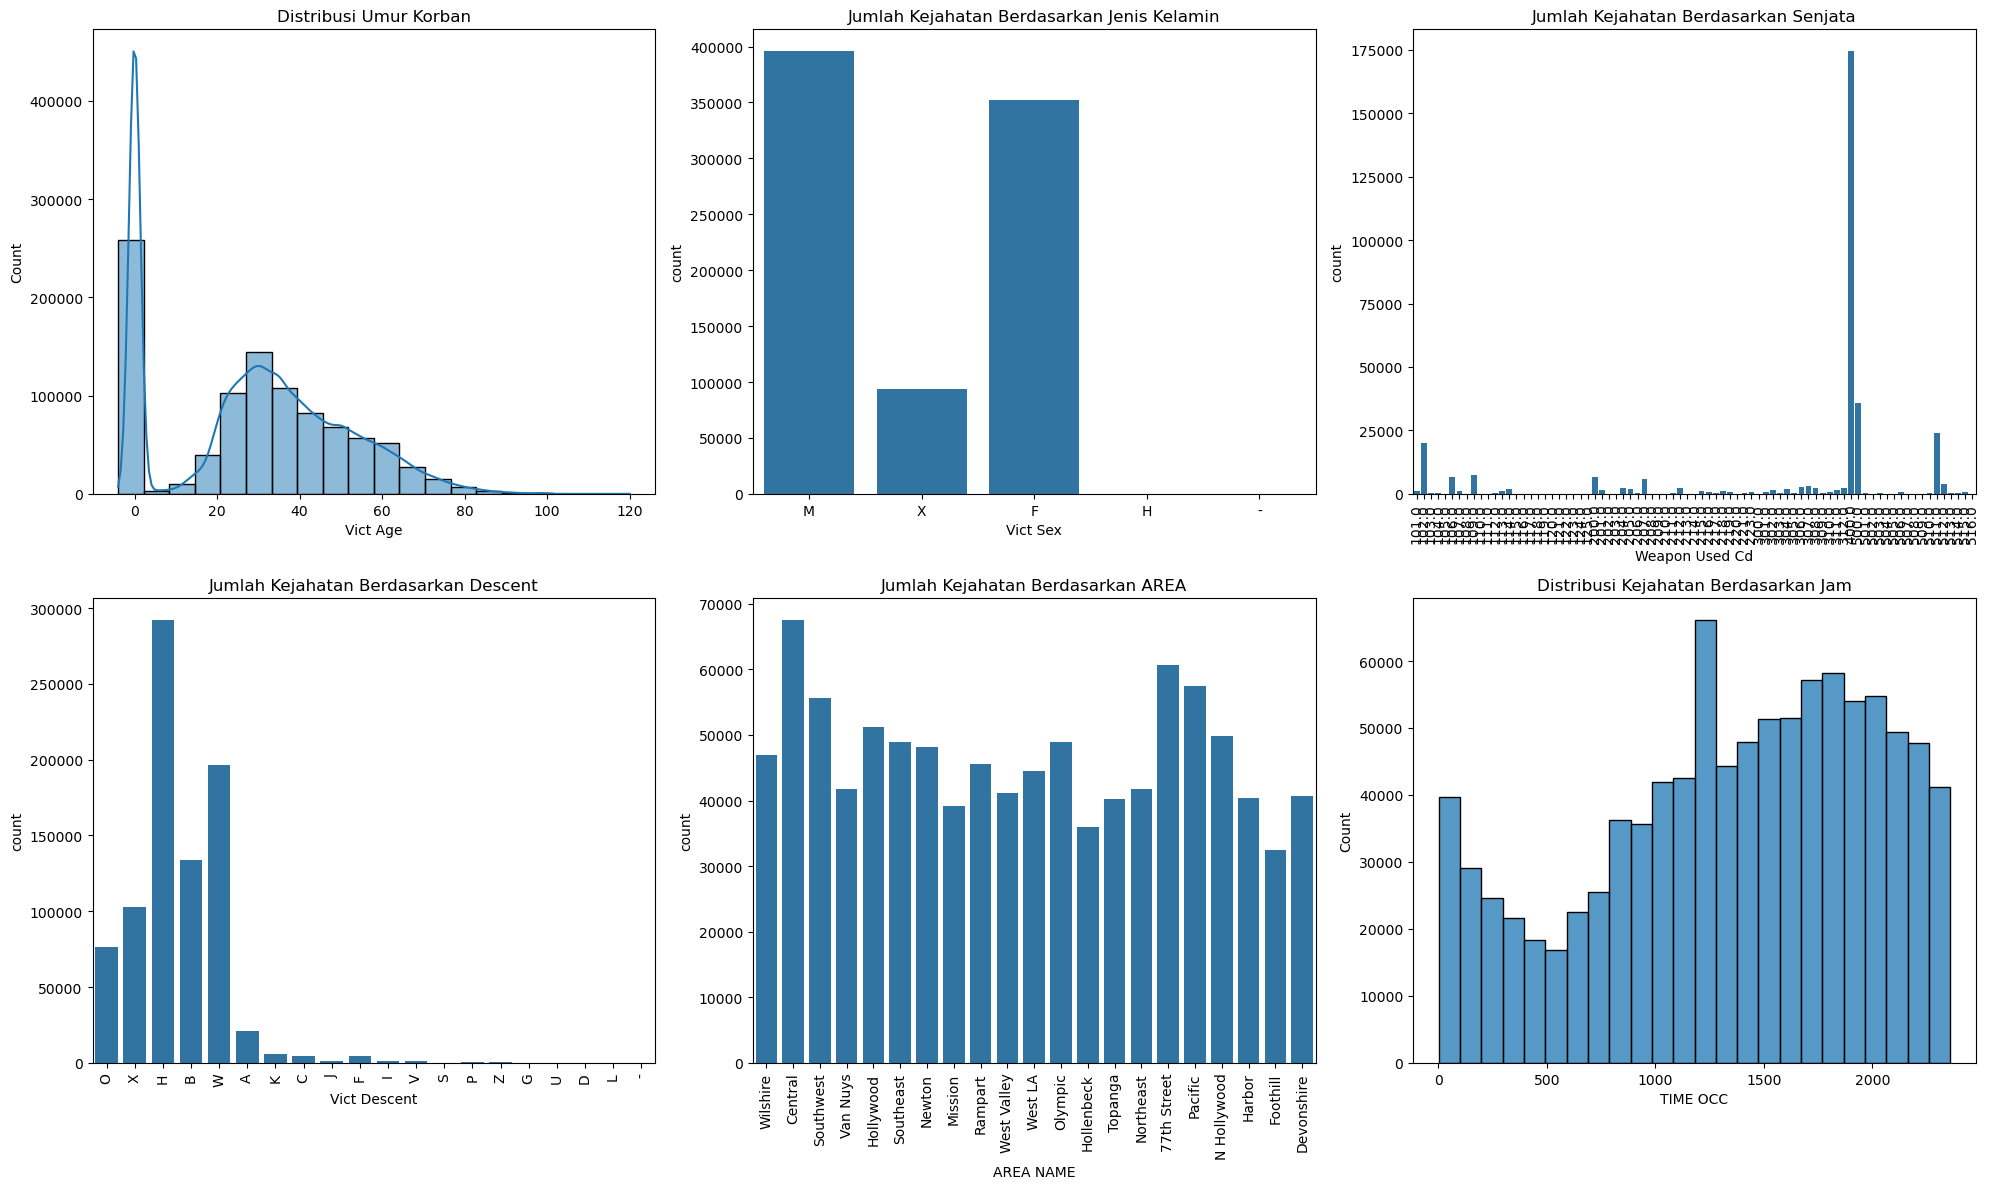

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Mengasumsikan dataset sudah dibaca ke dalam df
# Buat figure dengan 8 subplot (2x4 grid)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Plot 1: Histogram Distribusi Umur Korban (Vict Age)
sns.histplot(df['Vict Age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Umur Korban')

# Plot 2: Bar Plot Jumlah Kejahatan Berdasarkan Jenis Kelamin Korban
sns.countplot(x='Vict Sex', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Jumlah Kejahatan Berdasarkan Jenis Kelamin')

# Plot 3: Bar Plot Jumlah Kejahatan Berdasarkan Ras atau Descent
sns.countplot(x='Vict Descent', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Jumlah Kejahatan Berdasarkan Descent')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot 4: Distribusi Kejahatan Berdasarkan Waktu (TIME OCC)
sns.histplot(df['TIME OCC'], bins=24, kde=False, ax=axes[1, 2])
axes[1, 2].set_title('Distribusi Kejahatan Berdasarkan Jam')

# Plot 5: Distribusi Kejahatan Berdasarkan Bulan (Month)
sns.countplot(x='Weapon Used Cd', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Jumlah Kejahatan Berdasarkan Senjata')
axes[0, 2].tick_params(axis='x', rotation=90)

# Plot 5: Jumlah Kejahatan Berdasarkan AREA
sns.countplot(x='AREA NAME', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Jumlah Kejahatan Berdasarkan AREA')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


### Analisis Struktur Data
Hasil dari pemeriksaan kolom didapatkan bahwa terdapat 27 kolom  dengan jumal data sebanyak 978628 dalam dataset ini, kemudian jumlah kolom numerik sebanyak 15 kolom dan kolom kategorikal sebanyak 13 kolom.

Dengan rincian sebagai berikut:
- Kolom numerik: `['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Vict Age', 'Premis Cd', 'Weapon Used Cd', 'Crm Cd 1', 'Crm Cd 2' 'Crm Cd 3', 'Crm Cd 4', 'LAT', 'LON']`

- Kolom kategorikal: `['Rptd', 'DATE OCC', 'AREA NAME', 'Crm Cd Desc', 'Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION', 'Cross Street']`

### Analisis Statistik Deskriptif

Dari hasil analisis statistik deskriptif, didapatkan bahwa:
- Usia korban (Vict Age) memiliki nilai minimum sebesar -4 dan maksimum sebesar 120.

## Pembersihan Data

### Analisis Missing Values

Dari hasil analisis missing values, didapatkan bahwa terdapat beberapa kolom yang memiliki missing values, yaitu:
```
- Mocodes           143980
- Vict Sex          137198
- Vict Descent      137209
- Premis Cd             15
- Premis Desc          585
- Weapon Used Cd    652669
- Weapon Desc       652669
- Status                 1
- Crm Cd 1              11
- Crm Cd 2          909812
- Crm Cd 3          976319
- Crm Cd 4          978564
- Cross Street      827201
```

Dari hasil analisis missing values, dapat dilihat bahwa kolom `Mocodes`, `Crm Cd 2`, `Crm Cd 3`, `Crm Cd 4`, dan `Cross Street` memiliki missing values yang sangat tinggi, sehingga perlu dilakukan penanganan missing values pada kolom-kolom tersebut.

Sedangkan untuk kolom `Vict Sex`, `Vict Descent`, memiliki missing values yang cukup tinggi, namun karena kolom tersebut merupakan kolom kategorikal, maka missing values pada kolom tersebut akan diisi dengan X atau unknown.

Kemudian, untuk kolom `Premis Cd`, `Premis Desc`, `Status`, `Crm Cd 1`, karena missing values pada kolom tersebut sangat sedikit, maka missing values pada kolom tersebut akan didrop.

In [421]:
# Menghapus kolom yang memiliki missing value
# `Weapon Used Cd`, `Weapon Desc`, `Crm Cd 2`, `Crm Cd 3`, `Crm Cd 4`, dan `Cross Street` 
df.drop(['Mocodes', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'], axis=1, inplace=True)

In [422]:
# Update missing value pada Vict Sex dan Vict Descent dengan nilai Unknown atau X pada kolom Vict Sex dan kolom Vict Descent
# F - Female M - Male X - Unknown

# Mengupdate nilai missing value pada kolom Vict Sex dengan 'X'
df['Vict Sex'].fillna('X', inplace=True)

# Mengupdate nilai missing value pada kolom Vict Descent dengan 'Unknown'
df['Vict Descent'].fillna('X', inplace=True)

# Mengupdate nilai missing value pada kolom Weapon Used Cd dengan 0
df['Weapon Used Cd'].fillna(0, inplace=True)

# Mengupdate nilai missing value pada kolom Weapon Desc dengan 'Unknown'
df['Weapon Desc'].fillna('Unknown', inplace=True)


/var/folders/ft/5yvhz_g95kq24x3zxwvjp1t80000gn/T/ipykernel_2357/581149063.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vict Sex'].fillna('X', inplace=True)
/var/folders/ft/5yvhz_g95kq24x3zxwvjp1t80000gn/T/ipykernel_2357/581149063.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [423]:
# Drop missing value pada kolom Premis Cd, Premis Desc, dan Status, Crm Cd 1 karena jumlahnya sedikit
df.dropna(subset=['Premis Cd', 'Premis Desc', 'Status', 'Crm Cd 1'], inplace=True)


In [424]:
# Drop umur yang tidak masuk akal (umur < 0)
df = df[(df['Vict Age'] >= 0)]

In [425]:
# Menghapus kolom yang tidak diperlukan LAT dan LON karena sudah ada kolom Area dan LOCATION
df.drop(['LAT', 'LON', 'Status Desc'], axis=1, inplace=True)

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977899 entries, 0 to 978627
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           977899 non-null  int64  
 1   Date Rptd       977899 non-null  object 
 2   DATE OCC        977899 non-null  object 
 3   TIME OCC        977899 non-null  int64  
 4   AREA            977899 non-null  int64  
 5   AREA NAME       977899 non-null  object 
 6   Rpt Dist No     977899 non-null  int64  
 7   Part 1-2        977899 non-null  int64  
 8   Crm Cd          977899 non-null  int64  
 9   Crm Cd Desc     977899 non-null  object 
 10  Vict Age        977899 non-null  int64  
 11  Vict Sex        977899 non-null  object 
 12  Vict Descent    977899 non-null  object 
 13  Premis Cd       977899 non-null  float64
 14  Premis Desc     977899 non-null  object 
 15  Weapon Used Cd  977899 non-null  float64
 16  Weapon Desc     977899 non-null  object 
 17  Status         

## Check Outliers

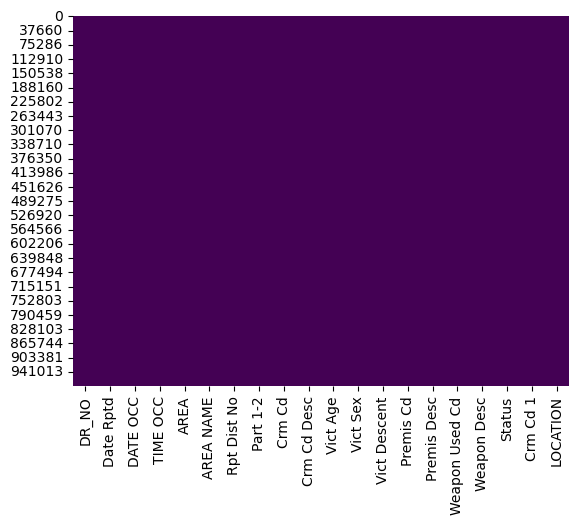

In [427]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


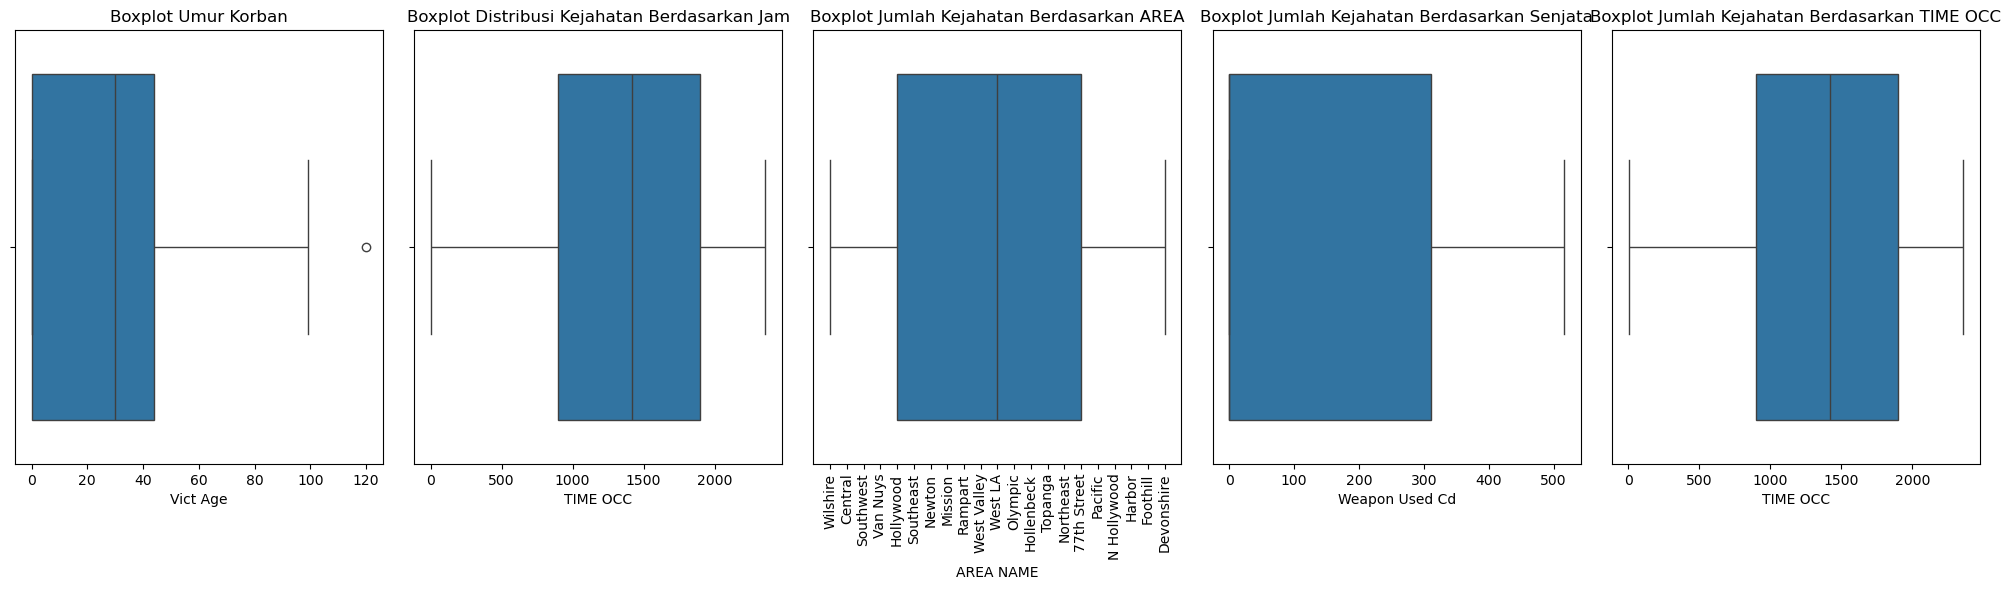

In [428]:
# Outliner

fig, axes = plt.subplots(1, 5, figsize=(20, 6))

# Plot 1: Boxplot Umur Korban (Vict Age)
sns.boxplot(x='Vict Age', data=df, ax=axes[0])
axes[0].set_title('Boxplot Umur Korban')

# Plot 2: Boxplot Jumlah Kejahatan Berdasarkan Jenis Kelamin Korban
sns.boxplot(x='TIME OCC', data=df, ax=axes[1])
axes[1].set_title('Boxplot Distribusi Kejahatan Berdasarkan Jam')

# Plot 5: Boxplot Jumlah Kejahatan Berdasarkan AREA
sns.boxplot(x='AREA NAME', data=df, ax=axes[2])
axes[2].set_title('Boxplot Jumlah Kejahatan Berdasarkan AREA')
axes[2].tick_params(axis='x', rotation=90)

# Plot 5: Boxplot Jumlah Kejahatan Berdasarkan Senjata
sns.boxplot(x='Weapon Used Cd', data=df, ax=axes[3])
axes[3].set_title('Boxplot Jumlah Kejahatan Berdasarkan Senjata')

# Plot 5: Boxplot Jumlah Kejahatan Berdasarkan TIME OCC
sns.boxplot(x='TIME OCC', data=df, ax=axes[4])
axes[4].set_title('Boxplot Jumlah Kejahatan Berdasarkan TIME OCC')

plt.tight_layout()
plt.show()


In [429]:
# Cek Duplikasi Data
duplicate = df.duplicated().sum()
print('Duplicate Data: ', duplicate)

Duplicate Data:  0


### Hasil Eliminasi Data
Dari hasil eliminasi data, didapatkan data baru dengan jumlah baris sebanyak 977898 baris dan 18.

# Transformasi Data 

Dalam tahap ini, dilakukan beberapa transformasi data, yaitu:
1. Konversi waktu dan tanggal ke dalam format yang dapat diolah.
2. Pengkodean variabel kategorikal.
3. Normalisasi atau standarisasi untuk kolom numerik.
4. Feature engineering dengan membuat fitur baru berdasarkan waktu atau lokasi.

In [430]:
# Convert the 'Date OCC' column to datetime format
# 03/01/2020 12:00:00 AM
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')


In [431]:
# Konveri Kolom DATE RPTD ke tipe 
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')


In [432]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Crm Cd 1,LOCATION
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,M,O,101.0,STREET,0.0,Unknown,AA,510.0,1900 S LONGWOOD AV
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),0.0,Unknown,IC,330.0,1000 S FLOWER ST
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0.0,Unknown,IC,480.0,1400 W 37TH ST
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405.0,CLOTHING STORE,0.0,Unknown,IC,343.0,14000 RIVERSIDE DR
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,28,M,H,102.0,SIDEWALK,0.0,Unknown,IC,354.0,1900 TRANSIENT


In [433]:
# Pengkodean Label
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
le = LabelEncoder()

# Mengkode kolom Crm Cd, Area Name, Crm Cd Desc, Status, Status Desc, Premis Desc, Vict Descent
df['Vict Sex'] = le.fit_transform(df['Vict Sex'])


In [440]:
# Feature Engineering

# Menghitung lama waktu pelaporan kejahatan

df['REPORTED TIME'] = df['Date Rptd'] - df['DATE OCC']
df['REPORTED TIME'] = df['REPORTED TIME'].dt.days

In [441]:
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 977899 entries, 0 to 978627
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           977899 non-null  int64         
 1   Date Rptd       977899 non-null  datetime64[ns]
 2   DATE OCC        977899 non-null  datetime64[ns]
 3   TIME OCC        977899 non-null  int64         
 4   AREA            977899 non-null  int64         
 5   AREA NAME       977899 non-null  object        
 6   Rpt Dist No     977899 non-null  int64         
 7   Part 1-2        977899 non-null  int64         
 8   Crm Cd          977899 non-null  int64         
 9   Crm Cd Desc     977899 non-null  object        
 10  Vict Age        977899 non-null  int64         
 11  Vict Sex        977899 non-null  int64         
 12  Vict Descent    977899 non-null  object        
 13  Premis Cd       977899 non-null  float64       
 14  Premis Desc     977899 non-null  object  